In [24]:
import numpy as np

def jacobi(A, b, x0, tol, max_iterations):
    absError = []
    n = len(b)
    x = x0.copy()

    for k in range(max_iterations):
        x_new = np.zeros_like(x)

        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
            
        absError.append(np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, absError

        x = x_new

    return x, max_iterations, absError

In [25]:
import numpy as np

def gauss_seidel(A, b, x0, tol, max_iterations):
    absError = []
    
    n = len(b)
    x = x0.copy()

    for k in range(max_iterations):
        x_new = x.copy()

        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        
        absError.append(np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, absError

        
        x = x_new
        
        

    return x, max_iterations, absError
    

    

jacobi from tolerance 1-3
Solution: [ 3.0000225  -2.50000266  6.99998104]
Iterations: 3
Solution: [ 3.  -2.5  7. ]
Iterations: 6
Solution: [ 3.  -2.5  7. ]
Iterations: 8
gauss_seidel from tolerance 1-3
Solution: [ 3.00000035 -2.50000004  6.99999999]
Iterations: 3
Solution: [ 3.  -2.5  7. ]
Iterations: 4
Solution: [ 3.  -2.5  7. ]
Iterations: 6


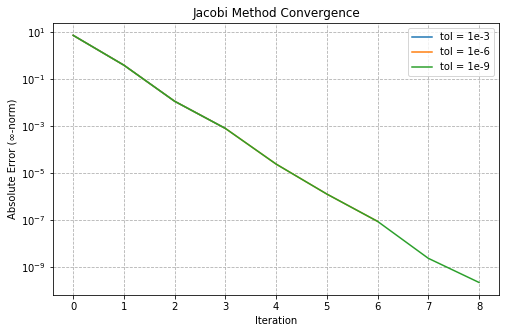

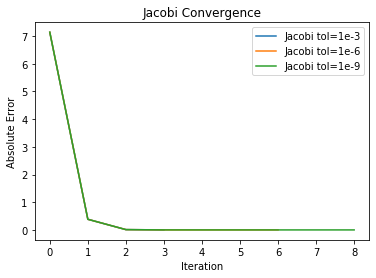

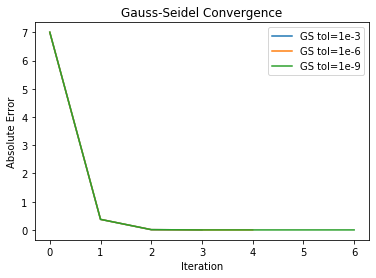

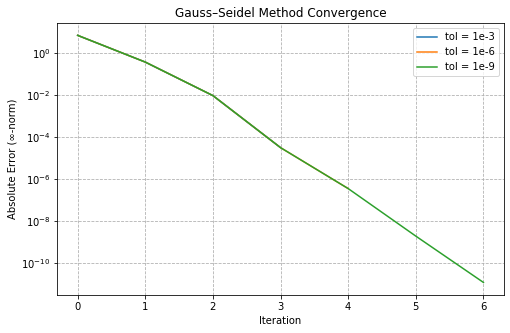

In [33]:
import matplotlib.pyplot as plt
A = np.array([[3, -.1, -.2,],
              [.1, 7, -.3],
              [.3, -.2, 10]])
b = np.array([7.85, -19.3, 71.4])
x0 = np.zeros_like(b)
tol1 = 1e-3
tol2 = 1e-6
tol3 = 1e-9
max_iterations = 100

solution1, iterations1, errors1 = jacobi(A, b, x0, tol1, max_iterations)
solution2, iterations2, errors2 = jacobi(A, b, x0, tol2, max_iterations)
solution3, iterations3, errors3 = jacobi(A, b, x0, tol3, max_iterations)

solution4, iterations4, errors4 = gauss_seidel(A, b, x0, tol1, max_iterations)
solution5, iterations5, errors5 = gauss_seidel(A, b, x0, tol2, max_iterations)
solution6, iterations6, errors6 = gauss_seidel(A, b, x0, tol3, max_iterations)


print("jacobi from tolerance 1-3")
print(f"Solution: {solution1}")
print(f"Iterations: {iterations1}")

print(f"Solution: {solution2}")
print(f"Iterations: {iterations2}")

print(f"Solution: {solution3}")
print(f"Iterations: {iterations3}")

print("gauss_seidel from tolerance 1-3")
print(f"Solution: {solution4}")
print(f"Iterations: {iterations4}")

print(f"Solution: {solution5}")
print(f"Iterations: {iterations5}")

print(f"Solution: {solution6}")
print(f"Iterations: {iterations6}")

plt.figure(figsize=(8, 5)) ##for plotting Jacobi utilized chatGPT because due formatting oscillations were hard to see

plt.semilogy(errors1, label="tol = 1e-3")
plt.semilogy(errors2, label="tol = 1e-6")
plt.semilogy(errors3, label="tol = 1e-9")

plt.xlabel("Iteration") 
plt.ylabel("Absolute Error (∞-norm)")
plt.title("Jacobi Method Convergence")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

plt.plot(range(len(errors1)), errors1, label="Jacobi tol=1e-3")
plt.plot(range(len(errors2)), errors2, label="Jacobi tol=1e-6")
plt.plot(range(len(errors3)), errors3, label="Jacobi tol=1e-9")

plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.title("Jacobi Convergence")
plt.legend()
plt.show()

plt.figure() ##Gauss-Seidel here, simpler thanthe one above thanks to easierto format

plt.plot(range(len(errors4)), errors4, label="GS tol=1e-3")
plt.plot(range(len(errors5)), errors5, label="GS tol=1e-6")
plt.plot(range(len(errors6)), errors6, label="GS tol=1e-9")

plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.title("Gauss-Seidel Convergence")
plt.legend()
plt.show()


plt.figure(figsize=(8, 5)) ##this part was also given by CHATGPT but I reject it because I do not understand semiology, I am including it here so I can ask Professor Dey about it in Class, 

plt.semilogy(errors4, label="tol = 1e-3")
plt.semilogy(errors5, label="tol = 1e-6")
plt.semilogy(errors6, label="tol = 1e-9")

plt.xlabel("Iteration")
plt.ylabel("Absolute Error (∞-norm)")
plt.title("Gauss–Seidel Method Convergence")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


#Discuss how tolerance affects the number of iterations needed for convergence:
# A tolerance means the room for error that the function can tolerate. A high toelrance means there will be less iterations, as it takes less iterations to get to a lower accuracy. A low tolerance leads to higher iterations in order to reach the desired accuracy. It takes more time, calculations to reach a higher accuracy.
#The 

In [30]:
A = np.array([
	[0.582745, 0.48	, 0.10, 0.  , 0.  ], 
 [0.48	, 1.044129, 0.46, 0.10, 0.  ],
 [0.10	, 0.46	, 1.10431 , 0.44, 0.10],
 [0.  	, 0.10	, 0.44, 0.963889, 0.42],
 [0.  	, 0.  	, 0.10, 0.42	, 0.522565]], dtype=float)
b = np.array([1.162745, 2.084129, 2.20431 , 1.923889, 1.042565], dtype=float)
